# PA 2: Classification - Decision Tree

## Student Details (1 Point)

First Student Name and ID: ABC 1001XXXXXX

Second Student Name and ID: XYZ 1001XXXXXX



Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

Rishitha Patel:1001863136
Karthik Natarajan:1001872904
Angad Tarikere Manjunatha:1001718335

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-20 points]


## Programming Assignment Details (7 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Heart dataset from cardio_train.csv  [1 points]

### Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.


2) Create a dataframe and print the first and last five records of your dataset.  [2 points]

3) Print the class labels.  [2 points]


4) Split your dataset 70% for training, and 30% for testing the classifier.  [2 points]

# DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split.  [2 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points]


4) Print the decision tree visualization.  [5 points]


# Naive Bayes (10 Points)


1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support).  [4 points]

## Report (20 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [4 points]


2) Describe the datasets [3 points]  like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [2 points]


4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [3 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!


## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import graphviz
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import pydotplus
from IPython.display import Image  
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 

In [3]:
cardio_train = pd.read_csv('cardio_train.csv', encoding='latin1')

cardio_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']] = cardio_train['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio'].str.split(";",expand=True,)
del cardio_train['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio']


In [4]:
#Prints the first 5 rows of the dataset cardio_train
cardio_train.head()

id    age gender height weight ap_hi ap_lo cholesterol gluc smoke alco  \
0  0  18393      2    168   62.0   110    80           1    1     0    0   
1  1  20228      1    156   85.0   140    90           3    1     0    0   
2  2  18857      1    165   64.0   130    70           3    1     0    0   
3  3  17623      2    169   82.0   150   100           1    1     0    0   
4  4  17474      1    156   56.0   100    60           1    1     0    0   

  active cardio  
0      1      0  
1      1      1  
2      0      1  
3      1      1  
4      0      0

In [5]:
#Prints the last 5 rows of the dataset cardio_train
cardio_train.tail()

id    age gender height weight ap_hi ap_lo cholesterol gluc smoke  \
69995  99993  19240      2    168   76.0   120    80           1    1     1   
69996  99995  22601      1    158  126.0   140    90           2    2     0   
69997  99996  19066      2    183  105.0   180    90           3    1     0   
69998  99998  22431      1    163   72.0   135    80           1    2     0   
69999  99999  20540      1    170   72.0   120    80           2    1     0   

      alco active cardio  
69995    0      1      0  
69996    0      1      1  
69997    1      0      1  
69998    0      0      1  
69999    0      1      0

In [6]:
#Split the dataset into features and target variable
feature_columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']
Features = cardio_train[feature_columns] # Features
Target = cardio_train.cardio # Target variable

for i in Target:
    print(i) #printing the class label values

0
1
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
1
0
1
1
0
0
0
1
1
0
1
1
1
1
1
1
0
0
0
0
1
1
1
1
0
0
1
1
1
0
1
0
0
1
1
0
1
1
1
1
1
0
1
0
1
1
1
1
1
0
0
1
1
1
0
1
1
1
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
0
1
1
1
0
1
0
0
1
1
1
1
0
0
0
1
1
0
0
0
0
0
1
1
1
1
0
0
1
0
0
1
1
0
1
1
1
1
0
1
1
0
0
0
0
0
1
1
0
1
1
1
1
1
0
1
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
1
1
0
1
0
0
1
1
1
0
0
1
1
1
1
1
0
1
1
1
0
0
0
1
1
0
1
1
0
1
0
1
0
1
0
1
0
1
1
0
1
1
0
0
0
0
1
0
0
1
0
1
0
1
1
0
1
0
1
1
1
1
0
1
0
1
0
0
1
0
0
1
1
1
0
1
1
0
1
1
1
0
0
1
1
1
1
1
1
1
0
0
1
0
1
1
0
1
0
1
1
1
1
0
1
0
0
0
0
1
1
1
0
0
1
1
0
1
0
1
0
0
0
1
0
1
0
0
1
1
0
0
1
1
1
0
0
1
0
1
0
1
0
1
0
0
1
1
1
0
1
1
0
0
1
1
0
0
0
1
0
0
1
1
0
1
0
0
1
0
0
1
1
1
0
1
0
1
0
0
1
0
1
0
0
0
0
1
1
1
0
0
1
1
0
1
0
1
0
1
1
0
0
1
1
1
1
0
0
0
1
1
1
1
1
1
1
0
1
1
1
0
1
0
0
1
0
0
0
1
1
0
0
1
1
0
0
0
0
1
0
1
1
0
1
0
1
0
1
1
1
1
1
0
0
1
1
1
1
0
0
1
0
1
1
1
0
0
1
1
0
0
1
0
1
1
1
1
0
0
0
0
1
0
0
1
0
1
0
1
0
0
1
0
0
1


In [7]:
# Spliting dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(Features, Target, test_size=0.3, random_state=1) # 70% training and 30% test

In [17]:
classification_using_gini = DecisionTreeClassifier(criterion = "gini", max_depth=4, random_state = 0) 
  
# Training the model
classification_using_gini.fit(X_train, Y_train) 

DecisionTreeClassifier(max_depth=4, random_state=0)

In [19]:
predict_gini_Y = classification_using_gini.predict(X_test); #Predicting the test values with the trained data model
print("Predicted values:")
print(predict_gini_Y) 
#Comparing the predicted values with the existing values in the dataset to get the accuracy of the model
print("Confusion Matrix: ", confusion_matrix(Y_test, predict_gini_Y)) 
      
print ("Accuracy : ", accuracy_score(Y_test,predict_gini_Y)*100,("%")) 
      
print("Report : ", classification_report(Y_test, predict_gini_Y)) 

Predicted values:
['1' '0' '1' ... '0' '0' '0']
Confusion Matrix:  [[7611 2741]
 [2906 7742]]
Accuracy :  73.10952380952381 %
Report :                precision    recall  f1-score   support

           0       0.72      0.74      0.73     10352
           1       0.74      0.73      0.73     10648

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



In [10]:
classification_using_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, random_state = 0) 
  
#Training the model
classification_using_entropy.fit(X_train, Y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [18]:
predict_entropy_Y = classification_using_entropy.predict(X_test);#Predicting the test values with the trained data model
print("Predicted values:") 
print(predict_entropy_Y)  
#Comparing the predicted values with the existing values to get the accuracy of the model
print("Confusion Matrix: ", confusion_matrix(Y_test, predict_entropy_Y)) 
      
print ("Accuracy : ", accuracy_score(Y_test,predict_entropy_Y)*100,("%")) 
      
print("Report : ", classification_report(Y_test, predict_entropy_Y)) 

Predicted values:
['1' '0' '1' ... '0' '0' '0']
Confusion Matrix:  [[7587 2765]
 [2897 7751]]
Accuracy :  73.03809523809524 %
Report :                precision    recall  f1-score   support

           0       0.72      0.73      0.73     10352
           1       0.74      0.73      0.73     10648

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



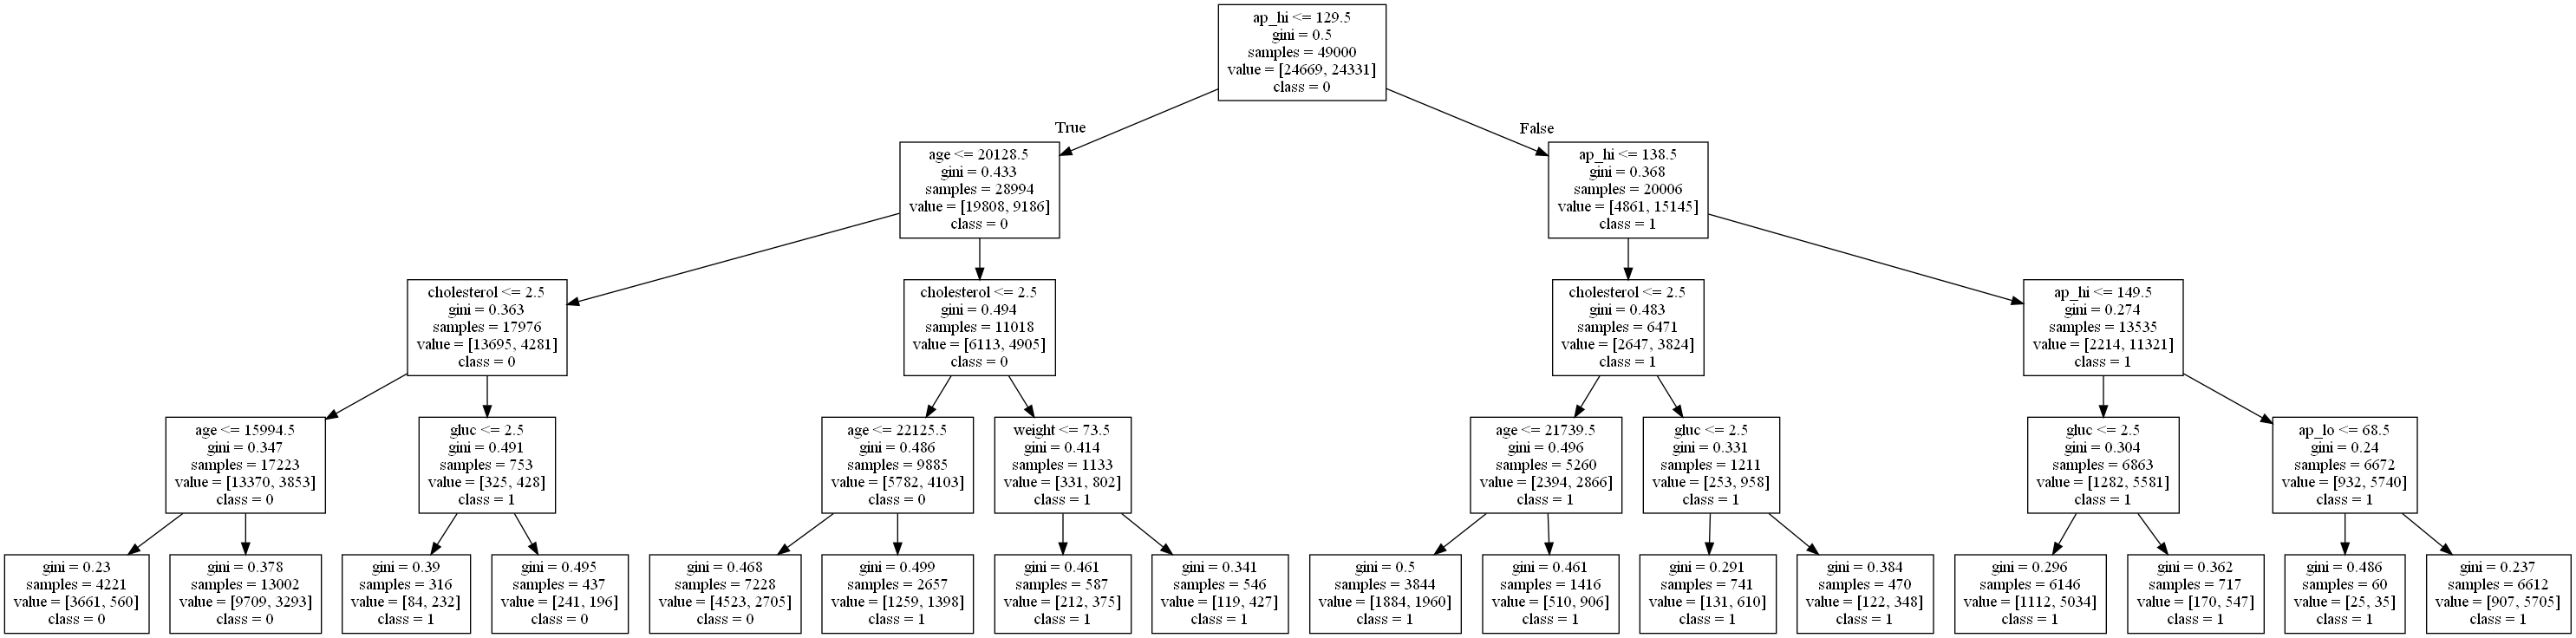

In [12]:
#The grap_path consists of all the paths that decision tree goes and also the node values
grap_path = tree.export_graphviz(classification_using_gini, out_file=None, feature_names = feature_columns, class_names=['0','1'])

# The below line will convert the paths to a graph
graph_gini = pydotplus.graph_from_dot_data(grap_path)  

# Shows the decision tree
Image(graph_gini.create_png())

In [20]:
#The grap_path consists of all the paths that decision tree goes and also the node values
grap_path = tree.export_graphviz(classification_using_entropy, out_file=None, feature_names = feature_columns, class_names=['0','1'])

# The below line will convert the paths to a graph
graph_entropy = pydotplus.graph_from_dot_data(grap_path)  

# Shows the decision tree
Image(graph_entropy.create_png())

In [16]:
NB = GaussianNB() #using gaussin navie bayes classifier
NB.fit(X_train, Y_train)   #training the model with the train datasets
  
# making predictions on the testing set 
predict_Y = NB.predict(X_test) 
  
# comparing actual response values with predicted response values 
print("Naive Bayes model accuracy in percentage:", metrics.accuracy_score(Y_test, predict_Y)*100,("%"))
print(confusion_matrix(Y_test, predict_Y))
print(classification_report(Y_test, predict_Y))

Naive Bayes model accuracy in percentage: 53.6 %
[[10006   346]
 [ 9398  1250]]
              precision    recall  f1-score   support

           0       0.52      0.97      0.67     10352
           1       0.78      0.12      0.20     10648

    accuracy                           0.54     21000
   macro avg       0.65      0.54      0.44     21000
weighted avg       0.65      0.54      0.44     21000

